<a href="https://colab.research.google.com/github/prodramp/python-projects/blob/main/neural-network-viz/UCI_Heart_Disease_Keras_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Source Link:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

CSV Formatted Dataset:
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

The dataset has 14 key attributes out of original 76, from the dataset along with their descriptions:

- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical - angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person’s resting blood pressure
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
- thalach: The person’s maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0–3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

Note: Make sure you have download the dataset from Kaggle link first. 

- Now we will upload the heart.csv from local file system to Google colab 
server.
- You can also use pandas to upload the file from local file system also
  - df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))


In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data


In [3]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

## **Collecting Source Data**

In [4]:
source = "https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/heart.csv"

In [5]:
df = pd.read_csv(source)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.shape

(303, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Now we need to split the dataset into target and training format.
- Target will have only target column
- Training data will have all the columns besides target column

In [9]:
df_input = pd.DataFrame(df.iloc[:, 0:13])

In [10]:
df_input.shape

(303, 13)

In [11]:
df_input

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
df_target = pd.DataFrame(df.iloc[:, 13],columns=['target'])

In [13]:
df_target.shape

(303, 1)

In [14]:
df_target

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Transforming the training data so it can be understood by the deep learning engine. 

- StandardScaler removes the mean and scales the data to unit variance.

More info: 
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


In [15]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_input = scaler.fit_transform(df_input)

In [16]:
df_scaled_input

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])


- Splitting the dataset into two sets: 
  - training set
  - testing set. 
- Library Used:
   - scikit-learn library has been used with function sklearn.model_selection.train_test_split() function to split the source data

In [17]:
from sklearn.model_selection import train_test_split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df_scaled_input, df_target, test_size = 0.30, random_state = 5)
print("Training data Split (Train & Test)")
print(df_input_train.shape)
print(df_input_test.shape)

print("Target data Split (Train & Test)")
print(df_target_train.shape)
print(df_target_test.shape)

Training data Split (Train & Test)
(212, 13)
(91, 13)
Target data Split (Train & Test)
(212, 1)
(91, 1)


## **Creating Neural Network** 

**Build the Keras classifier to predict the heart disease**

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import  keras.optimizers 

**Keras Settings:**

- In the first line, we se the model as Sequential. 
- All Layers
  - Added 3 fully connected Dense layers, two hidden and one output. 
  - All layers are from Dense class.
- First Layer (Dense(30, input_dim=13, activation='tanh'))
  - The first input layer has inout dimension as 13 for all 13 columns.
  - the activation function is tanh
- Second Layer (Dense(20, activation='tanh'))
  - It has 20 neurons and the tanh activation function. 
- Output Layer (Dense(1, activation='sigmoid'))
  - Output layer has a single neuron (output) 
  - The sigmoid activation function is selected for binary classification problems 
  - Out target data is binay - Yes or No heart disease .


In [51]:
model = Sequential()

# No regularizer
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


Regularization:
- Regularization techniques reduces the neural network overfitting problem by adjusting the weight values to zero which are close to zero, 
- Regularization acts on the weights parameters and modifies the result loss function, which modifies the weight values.
- L1 regularization penalizes close to 0 weight values by making them equal to 0, works for both positive and negative weight values.
- L2 regularization penalizes both small weight values and relatively large one weight values, and transforms the values to a number close to 0, but not quite 0.

In [59]:
# YES regularizer

model = Sequential()

model.add(Dense(30, input_dim=13, activation='tanh', kernel_regularizer=keras.regularizers.l1()))
model.add(Dense(20, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=keras.regularizers.l1_l2(0.01)))

model.add(Dense(1, activation='sigmoid'))


# **Plotting Model**

**Plotting Keras Model**
- https://keras.io/api/utils/model_plotting_utils/


In [19]:
from keras.utils.vis_utils import plot_model

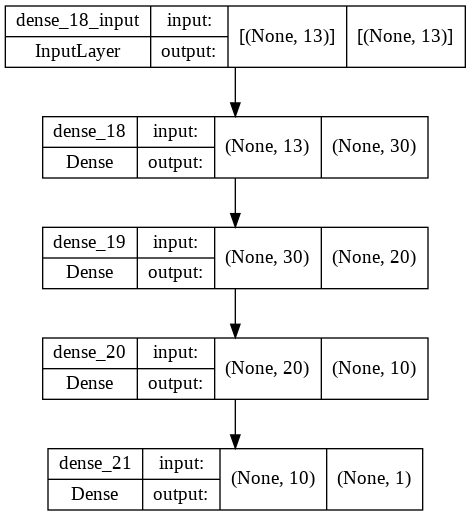

In [60]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
%matplotlib inline

import keras
from IPython.display import clear_output

In [24]:
# updatable live loss plot with Keras Model Training
# a minimal example (sort of)
# Code Source: https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

**Compile and fit Step:**

Compile function has 3 arguments:
- The adam optimizer: An algorithm for first-order gradient-based optimization.
- The binary_crossentropy loss function: logarithmic loss, which for a binary classification problem is defined in Keras as binary_crossentropy
- The accuracy metric: to evaluate the performance of your model during training and testing

Fit Function has the following parameters:
- epochs = 100

**Best Optimizer for binary classification:**

The most used optimizer by far is ADAM, under some assumptions on the boundness of the gradient of the objective function, this paper gives the convergence rate of ADAM, they also provide experimental to validate that ADAM is better then some other optimizers.

In [56]:
# Adam optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
# Adam Optimizer with learning rate

import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# SGD Optimizer
# model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['accuracy'])

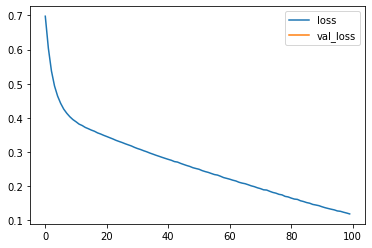

7/7 [==============================] - 0s 30ms/step - loss: 0.1191 - accuracy: 0.9858


In [53]:
history = model.fit(df_input_train, df_target_train, epochs=100, callbacks=[plot_losses], verbose=1)

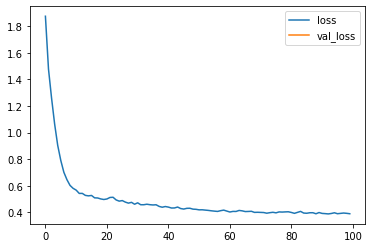

7/7 [==============================] - 0s 29ms/step - loss: 0.3899 - accuracy: 0.8679


In [62]:
# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(df_input_train, df_target_train, epochs=100, callbacks=[plot_losses], verbose=1)

In [41]:
model.summary()
score = model.evaluate(df_input_test, df_target_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.8241758346557617


In [29]:
history

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

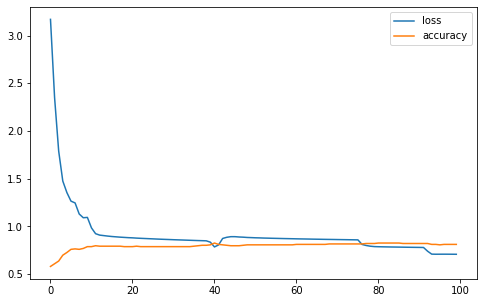

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [32]:
acc = history.history['accuracy']
loss = history.history['loss']

In [33]:
Target_Classification = model.predict(df_input_test)
Target_Classification = (Target_Classification > 0.5)



from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_target_test, Target_Classification))

[[39  4]
 [ 6 42]]


In [34]:
import numpy as np
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

0.9198113083839417


# **Model Visualization**

In [63]:
#model.save('keras-heart-model.mdl')

#model.save('keras-heart-model-adm-sig_1.h5')
model.save('keras-heart-model-adm-ref_lr.h5')


# New Section

**The SavedModel and HDF5 file contains:**
- the model's configuration (topology)
- the model's weights
- the model's optimizer's state (if any)

In [ ]:
model.optimizer.get_config()

In [ ]:
model.save('keras-heart-model-reg-sgd.h5')

In [ ]:
model.save('keras-heart-model-reg-sgd.h5', include_optimizer=True)

In [ ]:
model.save('keras-heart-model-reg-adm-lr.h5', include_optimizer=True)

In [ ]:
model.save('keras-heart-model-adam', include_optimizer=True)

In [ ]:
model.save('keras-heart-model-inc-op.h5', include_optimizer=True) 

In [64]:
model.save('keras-heart-model.tf')

INFO:tensorflow:Assets written to: keras-heart-model.tf/assets


In [ ]:
!ls -lah

In [ ]:
from google.colab import files
files.download('keras-heart-model.mdl') 

In [65]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
